In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

from psiam_tied_utils import psiam_tied_data_gen_wrapper

# params

In [2]:
# stim params
ABL_arr = [20]
ILD_arr = [3]

# Model params
rate_lambda = 0.076
theta_E = 50.7
T_0 = 0.19*(1e-3)
t_non_decision = 78e-3

V_A = 0.5
theta_A = 1

t_stim = 0.25
t_A_aff = 0.01
t_E_aff = 0.02
t_motor = 0.03
Z_E = 0

# sim params
N_sim = int(1e6)
dt = 1e-4

# fitting params
K_max = 10

# gen data

In [3]:
sim_results = Parallel(n_jobs=-1)(delayed(psiam_tied_data_gen_wrapper)(V_A, theta_A, ABL_arr, ILD_arr,\
                                                                        rate_lambda, T_0, theta_E, Z_E, \
                                                                            t_stim, t_A_aff, t_E_aff, t_motor, dt)\
                                                                                  for _ in range(N_sim))
# parse results
all_choice = np.array([res['choice'] for res in sim_results])
all_RT = np.array([res['rt'] for res in sim_results])
all_is_act = np.array([res['is_act'] for res in sim_results])


print(f"Num of AI process = {np.sum(all_is_act)}/{N_sim}")
print(f"Num of Aborts = {np.sum(all_RT < t_stim)}")
print(f"Num of up hits = {np.sum(all_choice == 1)}, Num of down hits = {np.sum(all_choice == -1)}")

Num of AI process = 202987/1000000
Num of Aborts = 45940
Num of up hits = 756206, Num of down hits = 243794


# sim + theory

In [4]:
from psiam_tied_utils import all_RTs_fit_fn

In [5]:
t_pts = np.linspace(0.001, 1.5, 2000)
ABL = ABL_arr[0]; ILD = ILD_arr[0]
theory = all_RTs_fit_fn(t_pts, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max)

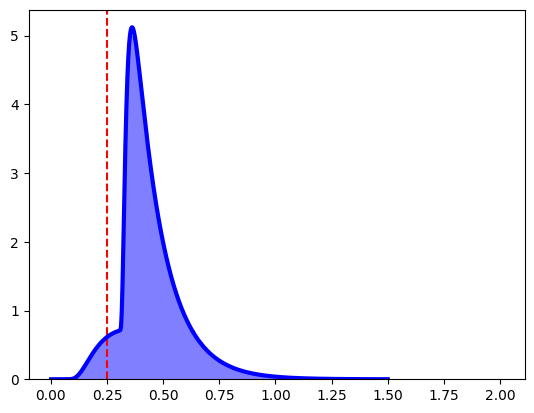

In [7]:
plt.hist(all_RT, bins=250, color='b', alpha=0.5, density=True);
plt.axvline(x=t_stim, color='r', linestyle='--')
plt.plot(t_pts, theory, 'b', lw=3)